In [1]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
rt_iot2022 = fetch_ucirepo(id=942)

# data (as pandas dataframes)
X = rt_iot2022.data.features
y = rt_iot2022.data.targets

# metadata
print(rt_iot2022.metadata)

# variable information
print(rt_iot2022.variables)


{'uci_id': 942, 'name': 'RT-IoT2022 ', 'repository_url': 'https://archive.ics.uci.edu/dataset/942/rt-iot2022', 'data_url': 'https://archive.ics.uci.edu/static/public/942/data.csv', 'abstract': 'The RT-IoT2022, a proprietary dataset derived from a real-time IoT infrastructure, is introduced as a comprehensive resource integrating a diverse range of IoT devices and sophisticated network attack methodologies. This dataset encompasses both normal and adversarial network behaviours, providing a general representation of real-world scenarios.\nIncorporating data from IoT devices such as ThingSpeak-LED, Wipro-Bulb, and MQTT-Temp, as well as simulated attack scenarios involving Brute-Force SSH attacks, DDoS attacks using Hping and Slowloris, and Nmap patterns, RT-IoT2022 offers a detailed perspective on the complex nature of network traffic. The bidirectional attributes of network traffic are meticulously captured using the Zeek network monitoring tool and the Flowmeter plugin. Researchers can

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [5]:
# put the datas into a single dataframe
data = pd.concat([X, y], axis=1)

In [6]:
data.head()

,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,38667,1883,tcp,mqtt,32.011598,9,5,3,3,0.281148,...,0.0,29729182.96,29729182.96,29729182.96,29729182.96,0.0,64240,26847,502,MQTT_Publish
1,51143,1883,tcp,mqtt,31.883584,9,5,3,3,0.282277,...,0.0,29855277.06,29855277.06,29855277.06,29855277.06,0.0,64240,26847,502,MQTT_Publish
2,44761,1883,tcp,mqtt,32.124053,9,5,3,3,0.280164,...,0.0,29842149.02,29842149.02,29842149.02,29842149.02,0.0,64240,26847,502,MQTT_Publish
3,60893,1883,tcp,mqtt,31.961063,9,5,3,3,0.281593,...,0.0,29913774.97,29913774.97,29913774.97,29913774.97,0.0,64240,26847,502,MQTT_Publish
4,51087,1883,tcp,mqtt,31.902362,9,5,3,3,0.282111,...,0.0,29814704.90,29814704.90,29814704.90,29814704.90,0.0,64240,26847,502,MQTT_Publish


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id.orig_p,123117.0,3.463926e+04,1.907062e+04,0.0,17702.000000,37221.000000,50971.000000,6.553500e+04
id.resp_p,123117.0,1.014305e+03,5.256372e+03,0.0,21.000000,21.000000,21.000000,6.538900e+04
flow_duration,123117.0,3.809566e+00,1.300054e+02,0.0,0.000001,0.000004,0.000005,2.172834e+04
fwd_pkts_tot,123117.0,2.268826e+00,2.233656e+01,0.0,1.000000,1.000000,1.000000,4.345000e+03
bwd_pkts_tot,123117.0,1.909509e+00,3.301831e+01,0.0,1.000000,1.000000,1.000000,1.011200e+04
...,...,...,...,...,...,...,...,...
idle.avg,123117.0,1.664985e+06,9.007064e+06,0.0,0.000000,0.000000,0.000000,3.000000e+08
idle.std,123117.0,4.550183e+04,1.091361e+06,0.0,0.000000,0.000000,0.000000,1.208029e+08
fwd_init_window_size,123117.0,6.118905e+03,1.871631e+04,0.0,64.000000,64.000000,64.000000,6.553500e+04
bwd_init_window_size,123117.0,2.739776e+03,1.001885e+04,0.0,0.000000,0.000000,0.000000,6.553500e+04


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123117 entries, 0 to 123116
Data columns (total 84 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id.orig_p                 123117 non-null  int64  
 1   id.resp_p                 123117 non-null  int64  
 2   proto                     123117 non-null  object 
 3   service                   123117 non-null  object 
 4   flow_duration             123117 non-null  float64
 5   fwd_pkts_tot              123117 non-null  int64  
 6   bwd_pkts_tot              123117 non-null  int64  
 7   fwd_data_pkts_tot         123117 non-null  int64  
 8   bwd_data_pkts_tot         123117 non-null  int64  
 9   fwd_pkts_per_sec          123117 non-null  float64
 10  bwd_pkts_per_sec          123117 non-null  float64
 11  flow_pkts_per_sec         123117 non-null  float64
 12  down_up_ratio             123117 non-null  float64
 13  fwd_header_size_tot       123117 non-null  i

In [12]:
# print all the type of attacks
print(data['Attack_type'].value_counts())

Attack_type
DOS_SYN_Hping                 94659
Thing_Speak                    8108
ARP_poisioning                 7750
MQTT_Publish                   4146
NMAP_UDP_SCAN                  2590
NMAP_XMAS_TREE_SCAN            2010
NMAP_OS_DETECTION              2000
NMAP_TCP_scan                  1002
DDOS_Slowloris                  534
Wipro_bulb                      253
Metasploit_Brute_Force_SSH       37
NMAP_FIN_SCAN                    28
Name: count, dtype: int64


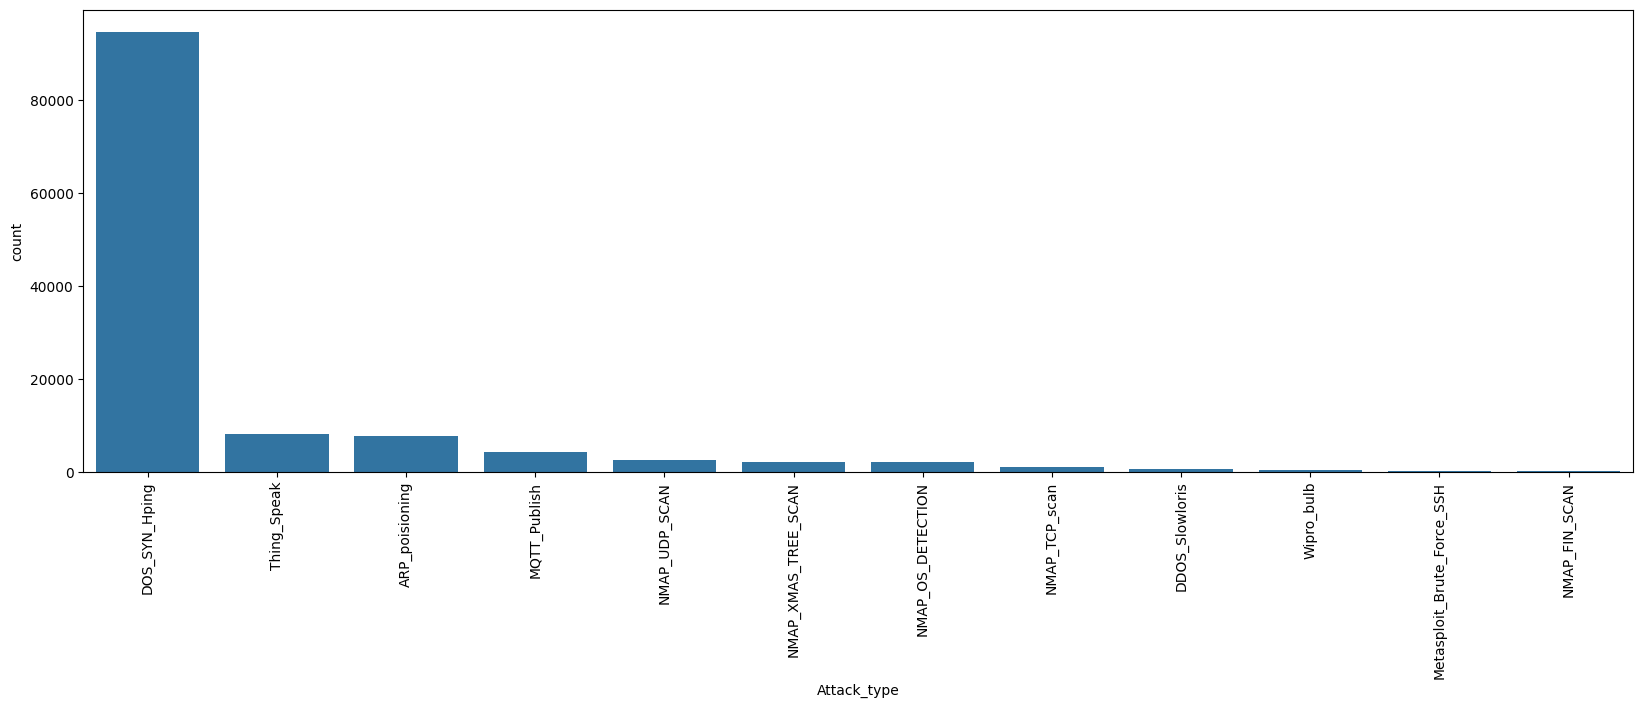

In [11]:
# display the distribution of attack types
figure = plt.subplots(figsize=(20,6))
sns.countplot(data=data,x=data['Attack_type'],order=data['Attack_type'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

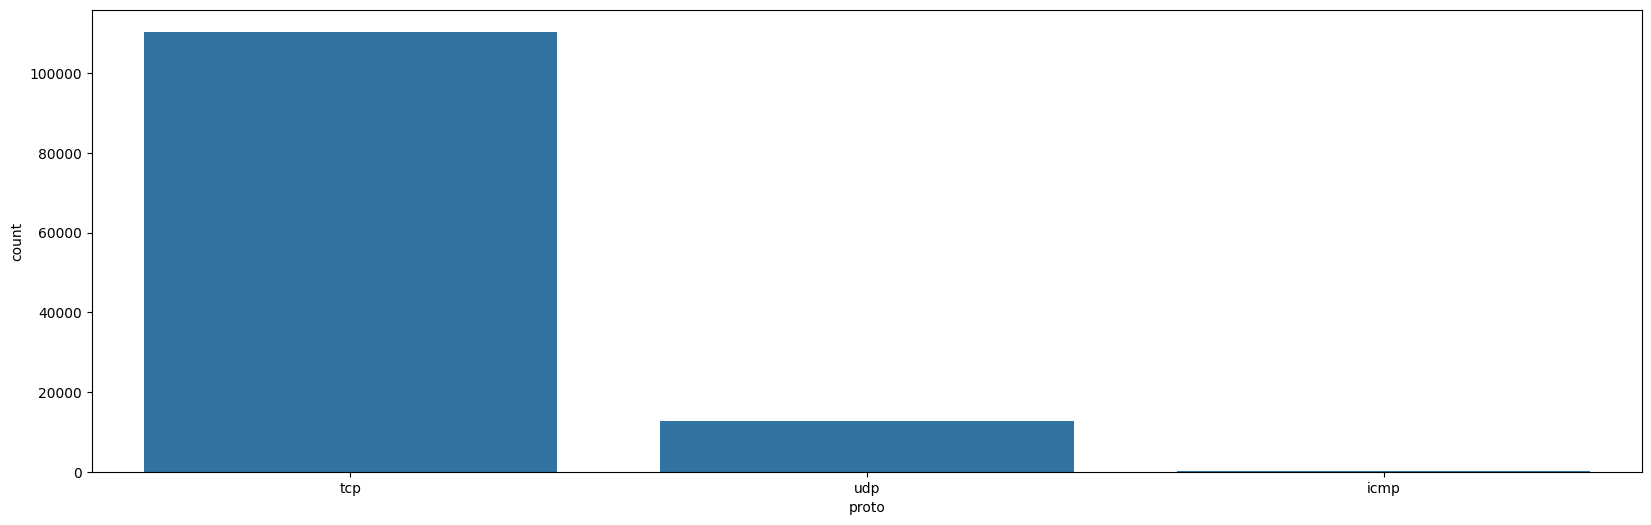

In [13]:
# display protocol distribution
figure = plt.subplots(figsize=(20,6))
sns.countplot(data=data,x=data['proto'],order=data['proto'].value_counts().index)
plt.show()

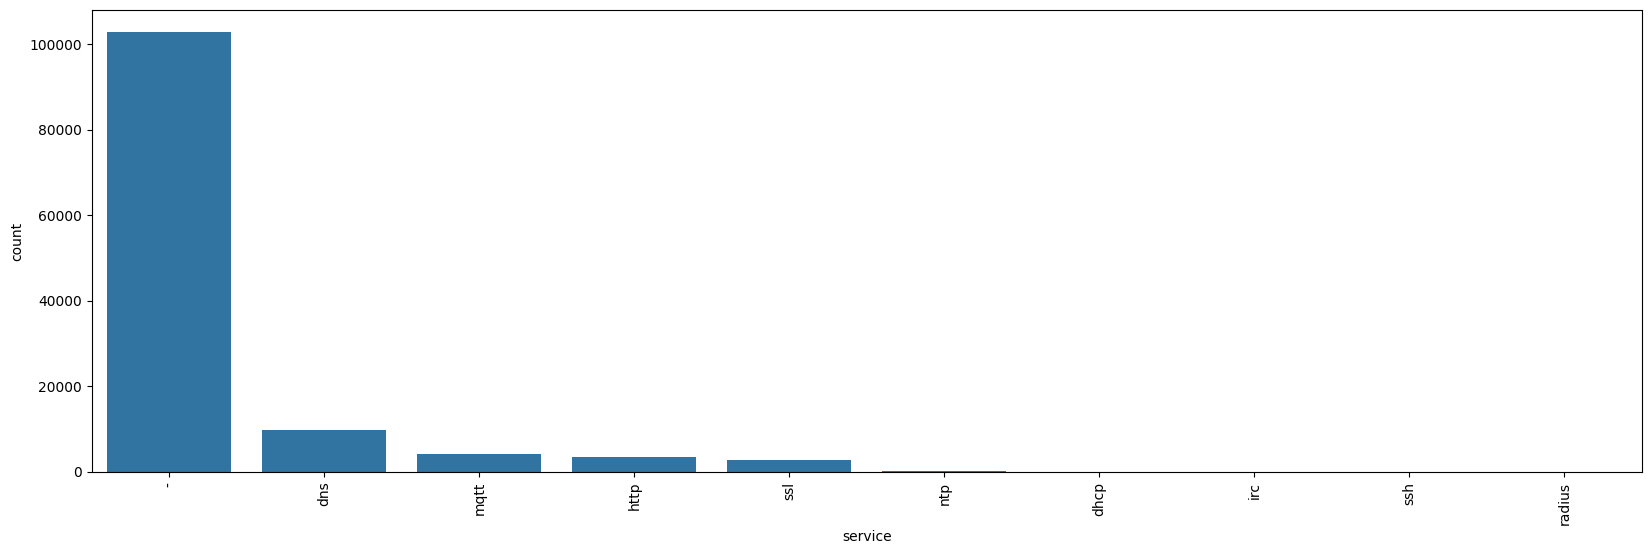

In [14]:
# display service distribution
figure = plt.subplots(figsize=(20,6))
sns.countplot(data=data,x=data['service'],order=data['service'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

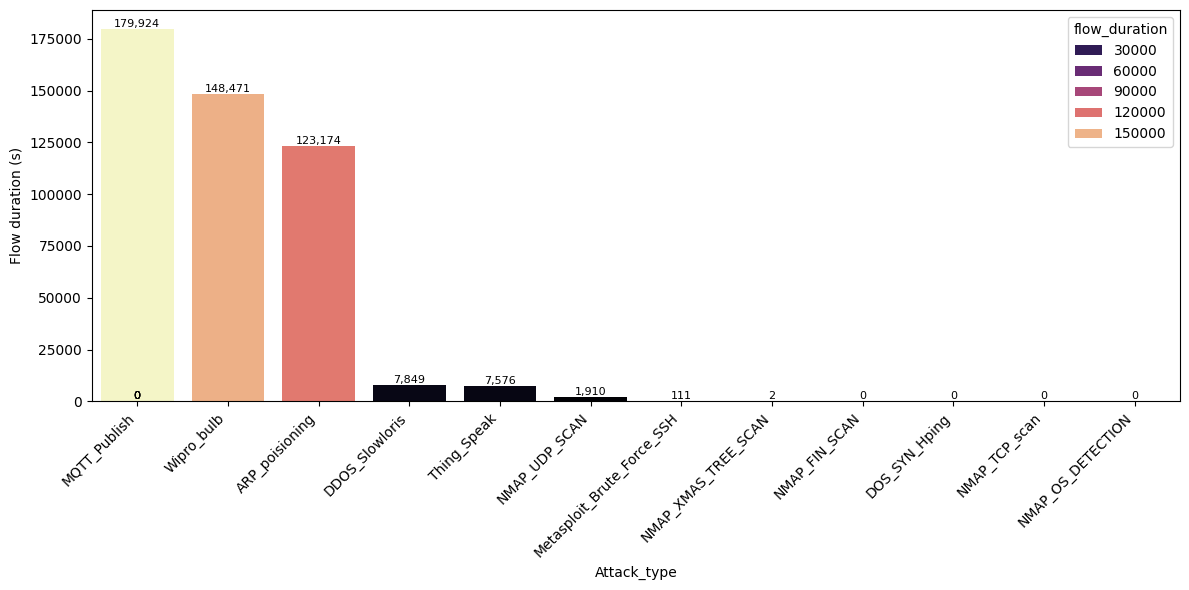

In [46]:
# Analyze the total flow duration per attack type
atk_df = (data.groupby('Attack_type')['flow_duration']
          .sum().sort_values(ascending=False).reset_index())

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x='Attack_type', y='flow_duration', hue='flow_duration', data=atk_df, palette='magma', ax=ax)
ax.set_xlabel('Attack_type'); ax.set_ylabel('Flow duration (s)')
plt.xticks(rotation=45, ha='right')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=8)
plt.tight_layout(); plt.show()

We remark that some of the attack types have more flow duration than others. This can be an important factor to consider when building a detection model, as attacks with longer flow durations may have different characteristics and behaviors compared to those with shorter durations.

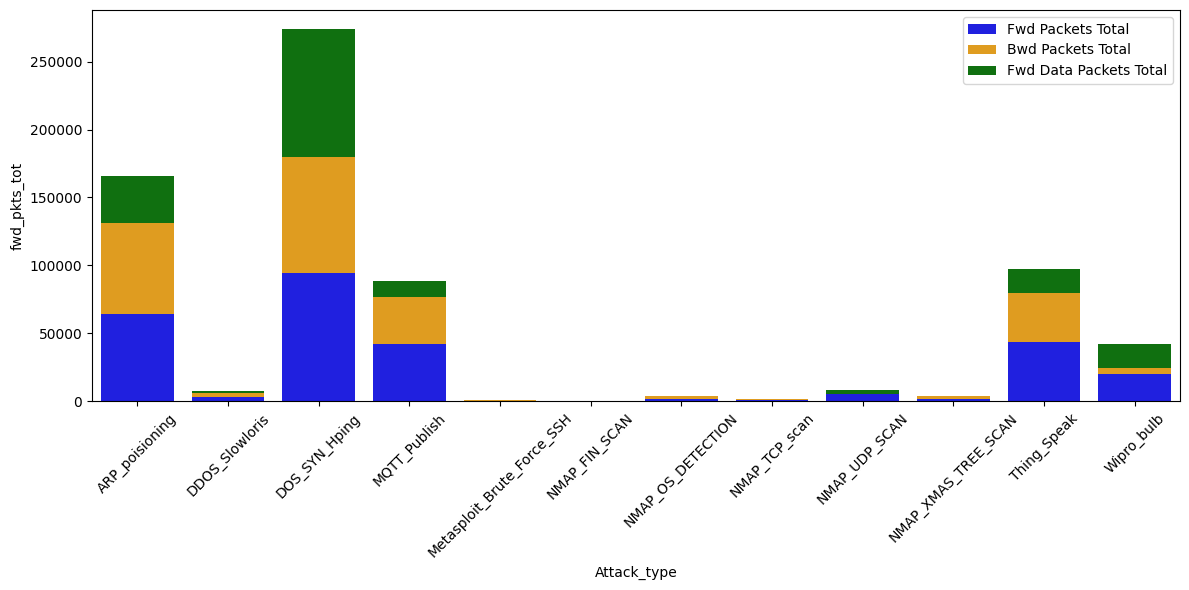

In [53]:
# Analyze the total forward and backward packets per attack type
atk_type_fwd_bwd_points = data.groupby('Attack_type')[['fwd_pkts_tot','bwd_pkts_tot','fwd_data_pkts_tot','bwd_data_pkts_tot']].sum()

figure = plt.subplots(figsize=(12,6))
sns.barplot(x = atk_type_fwd_bwd_points.index, y = atk_type_fwd_bwd_points['fwd_pkts_tot'], color='blue', label='Fwd Packets Total')
sns.barplot(x = atk_type_fwd_bwd_points.index, y = atk_type_fwd_bwd_points['bwd_pkts_tot'], color='orange', label='Bwd Packets Total', bottom=atk_type_fwd_bwd_points['fwd_pkts_tot'])
sns.barplot(x = atk_type_fwd_bwd_points.index, y = atk_type_fwd_bwd_points['fwd_data_pkts_tot'], color='green', label='Fwd Data Packets Total', bottom=atk_type_fwd_bwd_points['fwd_pkts_tot'] + atk_type_fwd_bwd_points['bwd_pkts_tot'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [56]:
# implement a first random forest to try classify the attacks
# encode categorical features
data_encoded = pd.get_dummies(data, columns=['proto', 'service'],
                            drop_first=True)
# split the data into features and target
X = data_encoded.drop('Attack_type', axis=1)
y = data_encoded['Attack_type']
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# create a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
# fit the model to the training data
rf.fit(X_train, y_train)
# make predictions on the test data
y_pred = rf.predict(X_test)
# print the classification report
print(classification_report(y_test, y_pred))
# print the confusion matrix
print(confusion_matrix(y_test, y_pred))

                            precision    recall  f1-score   support

            ARP_poisioning       0.99      0.99      0.99      2325
            DDOS_Slowloris       0.99      0.97      0.98       160
             DOS_SYN_Hping       1.00      1.00      1.00     28398
              MQTT_Publish       1.00      1.00      1.00      1244
Metasploit_Brute_Force_SSH       0.83      0.91      0.87        11
             NMAP_FIN_SCAN       0.88      0.88      0.88         8
         NMAP_OS_DETECTION       1.00      1.00      1.00       600
             NMAP_TCP_scan       1.00      1.00      1.00       301
             NMAP_UDP_SCAN       0.99      0.99      0.99       777
       NMAP_XMAS_TREE_SCAN       1.00      1.00      1.00       603
               Thing_Speak       0.99      0.99      0.99      2433
                Wipro_bulb       0.99      0.93      0.96        76

                  accuracy                           1.00     36936
                 macro avg       0.97      0.9

As the dataset is already very cleaned and pre-processed, we tried to implement a first Random Forest Classifier to classify the different attack types. The model achieved a good performance, indicating that the features in the dataset are informative for distinguishing between different types of attacks. Further hyperparameter tuning and feature engineering could potentially improve the model's performance even more.

Therefore our next steps will focus on optimizing the model and exploring other classification algorithms to make it run on edge IoT devices such as Raspberry Pi or ESP32.